<a href="https://colab.research.google.com/github/ssawant/Celeb_A_image_retrival/blob/main/JIO_assig_Celeb_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [3]:
import os
import shutil
import requests
import zipfile
import tensorflow_datasets as tfds

## Introduction 

We are going to use tesorflow 2.5 and tensflow dataset for this excersize. Due to ongoing issue with `celeb_a` tensorflow_dataset we are going to download directly from google drive

In [7]:
DATA_PATH = '/root/tensorflow_datasets'
DATASET_DEEPFASHION_PATH = os.path.join(DATA_PATH, 'downloads/manual')
DATASET_FILES_TO_DOWNLOAD = {
        'Anno-20210112T021116Z-001.zip': '1LAJ09ejs5Co-OEg_vwYipm1ac1LkHuRC',
        'celeb_a-test.tfrecord-00000-of-00002': '1U3-cro7p_aMpA2k1-2Ynz7mSg11Sijof',
        'celeb_a-test.tfrecord-00001-of-00002': '1MeL_DIur1IJrVmZZbfA7XCBdMcn8V-89',
        'celeb_a-train.tfrecord-00000-of-00016':'1FLC4FYKqOazOrpqkSIFhJm6JV5pqum7F',
        'celeb_a-train.tfrecord-00001-of-00016':'1jTwBTebuZu8LlWwm5AcTXX3pmH4Iusau',
        'celeb_a-train.tfrecord-00002-of-00016':'1qa6JfYFMkTPLHjC5mRSopdepNVRdCY3r',
        'celeb_a-train.tfrecord-00003-of-00016':'1BymLEc-QrFivM2YJiyNAKGJZ3w471qUe',
        'celeb_a-train.tfrecord-00004-of-00016':'1_gEsVl-OFT9ZvACVCvDWaViWjx5EJyfw',
        'celeb_a-train.tfrecord-00005-of-00016':'1kljEvnWONRjQlwaUHyXVrGm_DRNC7Pbj',
        'celeb_a-train.tfrecord-00006-of-00016':'1VKp3pLYHpWBhP4qe_BD5DneVpozdMeZR',
        'celeb_a-train.tfrecord-00007-of-00016':'1zd3ZUW3g7y5VF6S37Iy9vvg5TnAMC9Hw',
        'celeb_a-train.tfrecord-00008-of-00016':'1ceqI_CjQFSigpBOq61G7QEjeJ6HUGn3o',
        'celeb_a-train.tfrecord-00009-of-00016':'1eQmhOPIF45tq2YLns7X6DAA2UA-7BqAD',
        'celeb_a-train.tfrecord-00010-of-00016':'1DhLuLPWFwUjebEbH8qhihOEOY5fFnrMR',
        'celeb_a-train.tfrecord-00011-of-00016':'182Ie2v8mMYoOWycqn3YqJMJXD88cjUo9',
        'celeb_a-train.tfrecord-00012-of-00016':'1WMEJBA6G3NMCLNZwqf9ZCdb9mkwYNYVl',
        'celeb_a-train.tfrecord-00013-of-00016':'1OvFaqC-_H61EKjk-2OmriltXvA7YQRxt',
        'celeb_a-train.tfrecord-00014-of-00016':'1jvDAs01Q-JsqpZeRcsk9JPRtY0aQSkvZ',
        'celeb_a-train.tfrecord-00015-of-00016':'1pqHiegDfwahy9aKL6Ga2myZGUN1RIvaC',
        'celeb_a-valid.tfrecord-00000-of-00002':'1pIdVI2rLLaIIE47tJuwSNeNZAp7XHtxe',
        'celeb_a-valid.tfrecord-00001-of-00002':'1yUgkSQL8AiWdow5T6SGH-A9SAOK-KRNV',
        'dataset_info.json':'1LeojkH0JJHJRr9slv4ZDveq5_N6OVtQN',
        'Eval-20210112T021111Z-001.zip':'11lkl9EHcwR_v95g84uhB-aiBJb_Pxatc',
        'image.image.json':'1jIt-5GmsHEdfcDpgfu1Tb1hLfYpA71wr'
}

In [8]:
def download_gdrive_file(file_id, destination):
    base_url = 'https://drive.google.com/uc?export=download'

    session = requests.Session()
    response = session.get(base_url, params={'id': file_id}, stream=True)
    token = None

    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            token = value

    if token:
        params = {'id': file_id,
                  'confirm': token}

        response = session.get(base_url, params=params, stream=True)

    with open(destination, 'wb') as f:
        shutil.copyfileobj(response.raw, f)

    return destination

In [9]:
if os.path.isdir(DATASET_DEEPFASHION_PATH):
    shutil.rmtree(DATASET_DEEPFASHION_PATH)

os.makedirs(DATASET_DEEPFASHION_PATH)

for file_name, file_id in DATASET_FILES_TO_DOWNLOAD.items():
    print('Downloading %s...' % file_name)

    file_path = os.path.join(DATASET_DEEPFASHION_PATH, file_name)
    download_gdrive_file(file_id=file_id,
                         destination=file_path)

    if file_name.endswith('.zip'):
        print('Unzipping %s...' % file_name)

        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(DATASET_DEEPFASHION_PATH)

        os.remove(file_path)
print('Done !!!')

Unzipping Anno-20210112T021116Z-001.zip...
Unzipping Eval-20210112T021111Z-001.zip...
Done !!!


## Data Exploration 

let explore the `celeb_a` dataset including its `FeaturesDict`

In [4]:
celeba_bldr = tfds.builder('celeb_a')
print(celeba_bldr.info.features)

FeaturesDict({
    'attributes': FeaturesDict({
        '5_o_Clock_Shadow': tf.bool,
        'Arched_Eyebrows': tf.bool,
        'Attractive': tf.bool,
        'Bags_Under_Eyes': tf.bool,
        'Bald': tf.bool,
        'Bangs': tf.bool,
        'Big_Lips': tf.bool,
        'Big_Nose': tf.bool,
        'Black_Hair': tf.bool,
        'Blond_Hair': tf.bool,
        'Blurry': tf.bool,
        'Brown_Hair': tf.bool,
        'Bushy_Eyebrows': tf.bool,
        'Chubby': tf.bool,
        'Double_Chin': tf.bool,
        'Eyeglasses': tf.bool,
        'Goatee': tf.bool,
        'Gray_Hair': tf.bool,
        'Heavy_Makeup': tf.bool,
        'High_Cheekbones': tf.bool,
        'Male': tf.bool,
        'Mouth_Slightly_Open': tf.bool,
        'Mustache': tf.bool,
        'Narrow_Eyes': tf.bool,
        'No_Beard': tf.bool,
        'Oval_Face': tf.bool,
        'Pale_Skin': tf.bool,
        'Pointy_Nose': tf.bool,
        'Receding_Hairline': tf.bool,
        'Rosy_Cheeks': tf.bool,
        'Sidebu

Now load the data to `training`, `test` and `validation` set

In [28]:
train_ds, test_ds, val_ds = tfds.load('celeb_a', split=['train','test','validation'],shuffle_files=True, download=False)

function to normalize image as during tensorflow datapipeline

In [7]:
def image_processing(*args):
  img, labels = args
  labels = tf.squeeze(labels)
  label = tf.cast(labels, dtype=tf.float16)
  label = tf.reshape(label, shape=(-1,40))
  return img, label

always use `AUTOTUNE` save lot of compuatational resouceses

In [8]:
AUTOTUNE = tf.data.AUTOTUNE
BATCH_SIZE = 80

Now let as create datapipeline for loading data. All this hack are for tensorflow eager execution issues. Hopefully tensorflow will catckup with `Pytorch` regarding this one day. 

In [43]:
train_batch = train_ds.cache().batch(BATCH_SIZE).map(lambda args: tf.py_function(image_processing, inp=(args['image'], [v for v in args['attributes'].values()]), Tout=(tf.uint8,tf.float16))).prefetch(AUTOTUNE)

test_batch = test_ds.cache().batch(BATCH_SIZE).map(lambda args: tf.py_function(image_processing, inp=(args['image'], [v for v in args['attributes'].values()]), Tout=(tf.uint8,tf.float16))).prefetch(AUTOTUNE)

val_batch = val_ds.cache().batch(1).map(lambda args: tf.py_function(image_processing, inp=(args['image'], [v for v in args['attributes'].values()]), Tout=(tf.uint8,tf.float16))).prefetch(AUTOTUNE)

Now let as look at the sample to check how it come out. 

(80, 40)


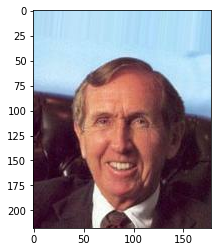

In [10]:
import matplotlib.pyplot as plt

for sample_img, sample_label in train_batch.take(1):
  sample_norm_img = tf.cast(sample_img[0], tf.float32)/255. # normalize the image to plot in plt.imshow
  plt.imshow(sample_norm_img)
  print(sample_label.shape)
  break

## The Model

In [11]:
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

num_features = 40
epochs = 10

Download the `MobileNetV2` Model

In [12]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(224,224,3), weights=None, include_top=False, pooling='avg') # GlobalAveragePooling 2D

Create the `data_augmentation` layer

In [13]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomTranslation(0.2, 0.2, fill_mode='nearest'),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2, fill_mode='nearest'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  # tf.keras.layers.experimental.preprocessing.Resizing(224,224)
])

In [14]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [15]:
inputs = tf.keras.Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model.output
x = Dense(1536, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(num_features, activation='sigmoid')(x)

In [16]:
model = Model(inputs=base_model.input, outputs=output)

In [17]:
model.compile(optimizer='adadelta',loss='cosine_similarity', metrics=['binary_accuracy'])

In [ ]:
model.summary()

In [19]:
model.input_shape

(None, 224, 224, 3)

Save the checkpoint 

In [18]:
# setup checkpoint callback:
save_path = "/content/"

model_path = f"{save_path}/weights-FC{num_features}-MobileNetV2" + "{val_binary_accuracy:.2f}.hdf5"

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    monitor='val_binary_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1)

# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', min_delta=0, patience=0, verbose=0,
#     mode='auto', baseline=None, restore_best_weights=False
# )

Let start training

In [19]:
history = model.fit(train_batch, epochs=epochs, validation_data=test_batch, callbacks=[checkpoint])

Epoch 1/10
2035/2035 [==============================] - 453s 214ms/step - loss: -0.3852 - binary_accuracy: 0.5018 - val_loss: -0.3566 - val_binary_accuracy: 0.4738

Epoch 00001: val_binary_accuracy improved from -inf to 0.47378, saving model to /content/weights-FC40-MobileNetV20.47.hdf5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
2035/2035 [==============================] - 425s 209ms/step - loss: -0.3909 - binary_accuracy: 0.5054 - val_loss: -0.3449 - val_binary_accuracy: 0.5129

Epoch 00002: val_binary_accuracy improved from 0.47378 to 0.51292, saving model to /content/weights-FC40-MobileNetV20.51.hdf5
Epoch 3/10
2035/2035 [==============================] - 414s 204ms/step - loss: -0.3950 - binary_accuracy: 0.5100 - val_loss: -0.3448 - val_binary_accuracy: 0.5287

Epoch 00003: val_binary_accuracy improved from 0.51292 to 0.52869, saving model to /content/weights-FC40-MobileNetV20.53.hdf5
Epoch 4/10
2035/2035 [==============================] - 427s 210ms/step - loss: -0.3983 - binary_accuracy: 0.5139 - val_loss: -0.3996 - val_binary_accuracy: 0.5826

Epoch 00004: val_binary_accuracy improved from 0.52869 to 0.58261, saving model to /content/weights-FC40-MobileNetV20.58.hdf5
Epoch 5/10
2035/2035 [==============================] - 425s 209ms/step - loss: -0.4012 - binary_accuracy: 0.5179 - val_loss: -

In [20]:
def plot_results(history, metrics):
  plt.figure(figsize=(10,6))
  plt.plot(history[metrics], 'b', label=metrics)
  plt.plot(history['val_'+metrics], 'r', label='val_'+metrics)
  plt.legend(loc='best')
  plt.show()

Visualize the result, require more epochs

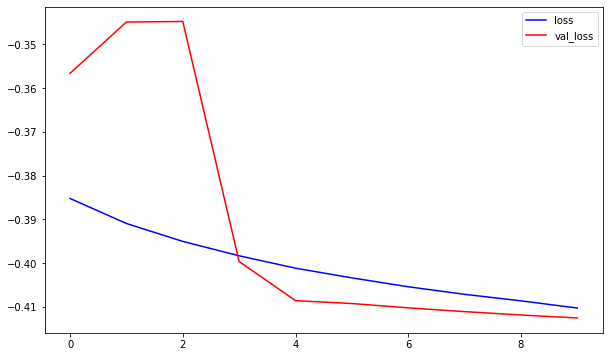

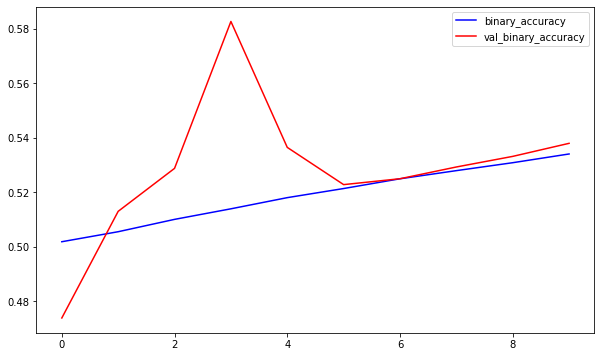

In [21]:
plot_results(history.history, 'loss')
plot_results(history.history, 'binary_accuracy')

## Image Retrival

Load the trained model

In [34]:
new_model = tf.keras.models.load_model(f"{save_path}/weights-FC40-MobileNetV20.58.hdf5")

In [44]:
new_model.evaluate(val_batch)

19867/19867 [==============================] - 146s 7ms/step - loss: -0.4501 - binary_accuracy: 0.5978


[-0.4501194655895233, 0.5978189706802368]

In [53]:
import numpy as np

get prediction from validaton set

In [124]:
prediction = np.where(new_model.predict(val_batch) > 0.5, 1, 0)

Calculate the similarity (distance) between images, we are using image at index `10` as query image

In [162]:
dists = np.linalg.norm(prediction - prediction[10], axis=1)

Extract 6 images (including query images) that have lowest distance

In [163]:
ids = np.argsort(dists)[:6]

In [166]:
p_list = list(ids)

In [159]:
val_store = list(image for image, label in val_batch.as_numpy_iterator())

## Visualize the result

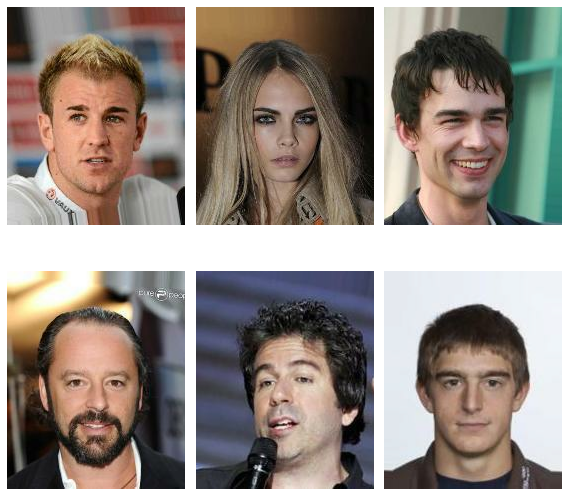

In [167]:
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(len(p_list)):
    axes.append(fig.add_subplot(2, 3, a+1))
    plt.axis('off')
    plt.imshow(val_store[p_list[a]][0]/255.)
fig.tight_layout()
plt.show()